In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltpip 
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence


In [2]:
df = pd.read_csv("/workspaces/all_in_one/team1proj/StellarDatasetML/data/Stellar_cleaned.csv")


In [3]:
df.shape

(79999, 8)

In [4]:
df.columns

Index(['Unnamed: 0', 'u', 'z', 'class', 'redshift', 'plate', 'MJD', 'ID'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  79999 non-null  int64  
 1   u           79999 non-null  float64
 2   z           79999 non-null  float64
 3   class       79999 non-null  int64  
 4   redshift    79999 non-null  float64
 5   plate       79999 non-null  int64  
 6   MJD         79999 non-null  int64  
 7   ID          79998 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 4.9 MB


In [6]:
#"STAR": 0, "GALAXY": 1, "QSO": 2
df['class'].value_counts()

0    47556
1    17274
2    15169
Name: class, dtype: int64

## Step-1: Separating the feature matrix and the target array.

In [7]:

# step-1: Seperating the features set and the target array
features = df[['Unnamed: 0', 'u', 'z', 'redshift',
       'plate', 'MJD', 'ID']] 
features = features.to_numpy() # converts feature set to numpy array
target = df['class'].to_numpy() # converts target column to numpy array

## Step-2: Declaring the standardization function.

In [8]:
# step-2: Function for standardizing data
def standardScaler(feature_array):

    total_cols = feature_array.shape[1] # total number of columns 
    for i in range(total_cols): # iterating through each column
        feature_col = feature_array[:, i]
        mean = feature_col.mean() # mean stores mean value for the column
        std = feature_col.std() # std stores standard deviation value for the column
        feature_array[:, i] = (feature_array[:, i] - mean) / std # standard scaling of each element of the column
    return feature_array


## Step-3: Performing standardization on the feature set.

In [9]:
features_scaled = standardScaler(features) 
features_scaled

array([[-1.73202606,  1.64091332,  0.30088941, ..., -0.45261289,
        -0.18968059,         nan],
       [-1.73198276, -0.05895256,  0.18837793, ..., -0.16452551,
         0.18700841,         nan],
       [-1.73193946,  0.61854937, -0.34990021, ..., -0.46413638,
        -0.17474578,         nan],
       ...,
       [ 1.73197947,  1.60680062,  0.51969128, ...,  2.03103919,
         1.57815791,         nan],
       [ 1.73202277, -1.67939239, -0.53892561, ..., -0.73188817,
        -0.55032849,         nan],
       [ 1.73206608, -0.27796044, -0.87663538, ..., -0.88982784,
        -0.77711628,         nan]])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


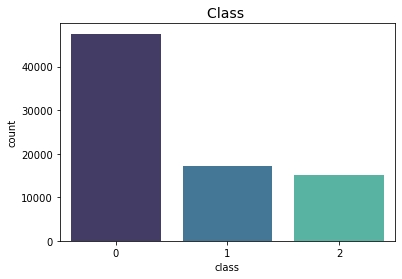

In [10]:
sns.countplot('class', data = df, palette="mako")
plt.title("Class ",fontsize=14)
plt.show()

## Declaring the split function.

In [11]:
def train_test_split(features, target, test_size = 0.3):
   
    num_total_rows = features.shape[0] # total rows in the dataset
    num_test_rows = np.round(num_total_rows * test_size) # total rows in testing dataset
    rand_row_num = np.random.randint(0, int(num_total_rows), int(num_test_rows)) # randomly generated row numbers
    
    # train and test features
    test_features = np.array([features[i] for i in rand_row_num]) # creates test feature set
    train_features = np.delete(features, rand_row_num, axis = 0) # deletes test data rows from main dataset; making it training dataset

    # train and test target
    test_target = np.array([target[i] for i in rand_row_num]) # creates test target set
    train_target = np.delete(target, rand_row_num, axis = 0) # creates training target set
    
    return train_features, train_target, test_features, test_target 

## Running the splitting function on our standardized dataset.

In [12]:
# running split function on our dataset
X_train, y_train, X_test, y_test = train_test_split(features_scaled, target, test_size = 0.3)

# printing the shape of the splits
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59294, 7), (59294,), (24000, 7), (24000,))

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
# define loss function
# loss = 'roc_auc'

from sklearn.metrics import accuracy_score 
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, preds)
loss = 'accuracy'

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:

# fit model with 5-fold CV
results = cross_val_score(knn, X_train_std, y_train, cv=kfold, scoring=loss)


np.round(results, 3)

NameError: name 'X_train_std' is not defined

### Declaring Python function to calculate Euclidean distance between 2 points.

In [ ]:
def euclidean_dist(pointA, pointB):
  
    distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
    distance = np.sum(distance) # adds all values
    distance = np.sqrt(distance) 
    return distance

### Declaring a Python function to calculate the distance from each point in the training data

In [ ]:
def distance_from_all_training(test_point):
    """Calculates euclidean distance of test point from all the points in the training dataset
    Args- 
        test_point- Data point from test set
    Returns- 
        dist_array- Array holding distance values for all training data points 
    """
    dist_array = np.array([])
    for train_point in X_train:
        dist = euclidean_dist(test_point, train_point)
        dist_array = np.append(dist_array, dist)
    return dist_array

### Note: Check problem here

In [ ]:
# Testing the distence Function
dist_array = distance_from_all_training(X_test[0])
dist_array

array([nan, nan, nan, ..., nan, nan, nan])

### Defining the KNN Classification function.